

## Dataset: Aquifer Petrignano

### Dataset Overview:

- **Name**: Aquifer Petrignano
- **Description**: This dataset contains time series data related to groundwater levels, rainfall, temperature, and hydrometry in the Aquifer Petrignano region. The data is collected over multiple years, capturing various environmental measurements. It is particularly useful for modeling groundwater levels, climate analysis, and time series forecasting.
- **Time Period**: Starting from 14/03/2006
- **Frequency**: Daily observations



In [20]:
!pip install mplfinance
!pip install opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.0 MB/s eta 0:00:00


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from mplfinance.original_flavor import candlestick_ohlc
from statsmodels.tsa.seasonal import seasonal_decompose

import datetime as dt
import matplotlib.dates as mdates
import math



from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, GRU, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [156]:
df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/Week 5/Practice Exercise/Datasets/Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,28/07/2009,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
1,21/06/2015,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2,10/10/2019,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
3,09/12/2011,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
4,20/09/2011,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [157]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-157-b9c6864122be>:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [158]:
df.sort_values(by='Date', inplace=True)

df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
331,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1525,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
852,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
2448,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
1984,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [149]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [85]:
df['Year'].value_counts()

,count
Year,
2008,366
2012,366
2016,366
2007,365
2009,365
2010,365
2011,365
2013,365
2014,365


## Exploratory Data Analysis (EDA)



In [5]:
df.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319188,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.252500,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.995000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-18.440000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [60]:
fig = px.line(df, x=df['Date'], y=['Depth_to_Groundwater_P24'], color_discrete_sequence=['#6988c3'],  title='Depth to Groundwater Over Time')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Depth to Groundwater (m)',
    legend_title='Depth to Groundwater'
)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [61]:
filtered_2019 = df[df['Year'] == 2019]
window = 30
filtered_2019['30-Day Moving Avg'] = filtered_2019['Depth_to_Groundwater_P24'].rolling(window=window).mean()

fig = px.line(
    filtered_2019,
    x='Date',
    y=['Depth_to_Groundwater_P24', '30-Day Moving Avg'],
    labels={
        'Date': 'Date',
        'value': 'Depth to Groundwater (m)',
        'variable': 'Measurement'
    },
    title=f'Depth to Groundwater and {window}-Day Moving Average (2019)',
    color_discrete_sequence=['#6988c3', '#fa8c89']
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Depth to Groundwater (m)',
    legend_title='',
    xaxis_tickangle=-45,
    width=900,
    height=500
)

fig.show()



<ipython-input-61-f1dc9d8d03e5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [53]:
fig = px.box(df, y="Depth_to_Groundwater_P24" )
fig.show()

## Data Preprocessing



### missing values

In [159]:
# Only handle missing values ​​for Depth_to_Groundwater_P24, since that's what I'll be using as a feature

df['Depth_to_Groundwater_P24'].fillna(df['Depth_to_Groundwater_P24'].mean(), inplace=True)

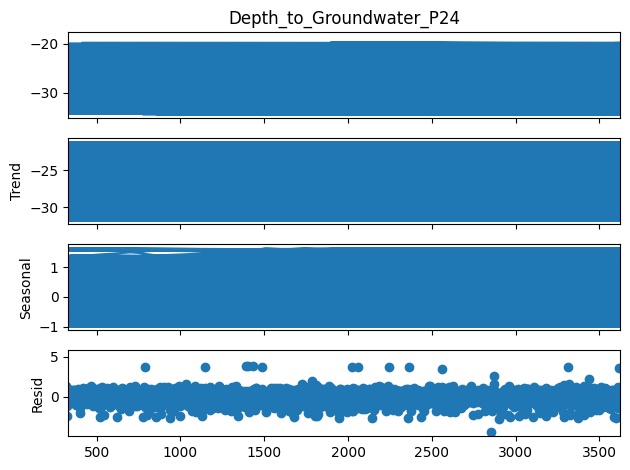

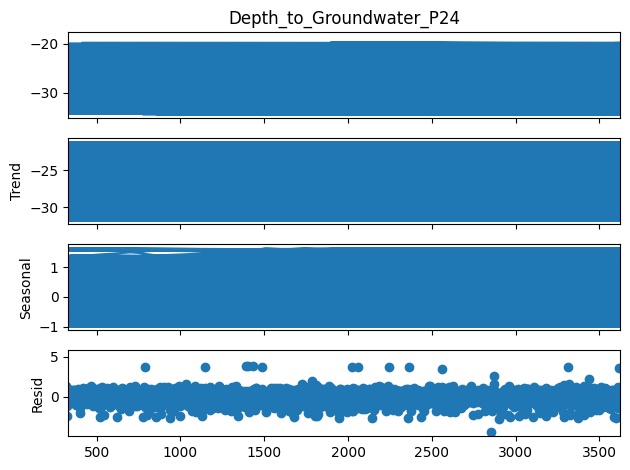

In [151]:
# ETS
result = seasonal_decompose(df['Depth_to_Groundwater_P24'],
                            model ='additive',
                            period=365)

result.plot()

## Feature Engineering



### Shift method

In [160]:
new_df = df[['Date', 'Depth_to_Groundwater_P24']]
new_df.set_index('Date', inplace=True)

new_df['Prev_Depth_to_Groundwater_P24'] = new_df['Depth_to_Groundwater_P24'].shift(1)
new_df.reset_index(inplace=True)

# drop the first row that contain nan value
new_df = new_df.drop(new_df.index[0])
new_df.head()


<ipython-input-160-9ddda9354dcf>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Depth_to_Groundwater_P24,Prev_Depth_to_Groundwater_P24
1,2006-03-15,-22.38,-22.48
2,2006-03-16,-22.25,-22.38
3,2006-03-17,-22.38,-22.25
4,2006-03-18,-22.60,-22.38
5,2006-03-19,-22.35,-22.60


### Extract features

In [173]:
# new_df['Day_of_Week'] = new_df['Date'].dt.dayofweek
# new_df['Month'] = new_df['Date'].dt.month
# new_df['Day_of_Year'] = new_df['Date'].dt.dayofyear
# new_df['IsWeekend'] = new_df['Date'].dt.dayofweek >= 5
# new_df['Depth_Diff'] = new_df['Depth_to_Groundwater_P24'].diff()

# # drop the first row that contain nan value
# new_df = new_df.drop(new_df.index[0])
# new_df.head()

In [161]:
new_df.set_index('Date', inplace=True)

## Train-Test Split



In [162]:
train_split = round(len(new_df) * 0.8)
train_data = new_df.iloc[:train_split]
test_data = new_df.iloc[train_split:]

## Feature Scaling



In [163]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [164]:
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0:dataset.shape[1]]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [165]:
X_train, y_train = create_dataset(train_data_scaled, 30)
X_test, y_test = create_dataset(test_data_scaled, 30)

In [166]:
print("Training set size:")
print(X_train.shape), print(y_train.shape)
print("Testing set size:")
print(X_test.shape), print(y_test.shape)

Training set size:
(4147, 30, 2)
(4147,)
Testing set size:
(1013, 30, 2)
(1013,)


(None, None)

## Model 1 Training



In [171]:
model_lstm = Sequential([
    LSTM(30, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),

    LSTM(30, return_sequences=False),
    Dropout(0.2),

    Dense(1)
])



model_lstm.compile(optimizer='adam', loss='mean_absolute_error')
model_lstm.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 30, 30)              │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 30, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 30)                  │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,311 (44.18 KB)

 Trainable params: 11,311 (44.18 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
Checkpoint = ModelCheckpoint(filepath  = 'my_weights.h5.keras', save_best_only= True)

early_stop = EarlyStopping(monitor='val_loss', patience=15 , restore_best_weights=True)

history_2 = model_lstm.fit(X_train,y_train,
                        epochs=80,
                        callbacks = [Checkpoint , early_stop],
                        validation_data=(X_test,y_test),
                        batch_size=32)

Epoch 1/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.1531 - val_loss: 0.0315
Epoch 2/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0510 - val_loss: 0.0175
Epoch 3/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0435 - val_loss: 0.0155
Epoch 4/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0423 - val_loss: 0.0231
Epoch 5/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0400 - val_loss: 0.0165
Epoch 6/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0376 - val_loss: 0.0286
Epoch 7/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0374 - val_loss: 0.0170
Epoch 8/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0347 - val_loss: 0.0126
Epoch 9/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0326 - val_loss: 0.0222
Epoch 10/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0327 - val_loss: 0.0125
Epoch 11/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0305 - val_loss: 0.0133
Epoch 12/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 

### Model 1 Evaluation


In [192]:
# predict X_test
predicted_values_test = model_lstm.predict(X_test)

predicted_values_test_reshaped = np.hstack((predicted_values_test, np.zeros((predicted_values_test.shape[0], 1))))
predicted_values_test_rescaled = scaler.inverse_transform(predicted_values_test_reshaped)
predicted_values_test_rescaled = predicted_values_test_rescaled[:, 0]
#y_test
y_test_reshaped = np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))))
testY_rescaled = scaler.inverse_transform(y_test_reshaped)
testY_rescaled = testY_rescaled[:, 0]



# predict X_train
predicted_values_train = model_lstm.predict(X_train)

predicted_values_train_reshaped = np.hstack((predicted_values_train, np.zeros((predicted_values_train.shape[0], 1))))
predicted_values_train_rescaled = scaler.inverse_transform(predicted_values_train_reshaped)
predicted_values_train_rescaled = predicted_values_train_rescaled[:, 0]
#y_train
y_train_reshaped = np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], 1))))
trainY_rescaled = scaler.inverse_transform(y_train_reshaped)
trainY_rescaled = trainY_rescaled[:, 0]


print(f'Test MAE: {mean_absolute_error(testY_rescaled, predicted_values_test_rescaled)}')
print(f'Train MAE: {mean_absolute_error(trainY_rescaled, predicted_values_train_rescaled)}')




data = {'Actual': testY_rescaled, 'Predicted': predicted_values_test_rescaled}
df = pd.DataFrame(data)


fig = px.line(df, x=df.index, y=['Actual', 'Predicted'], title='Depth to Groundwater Prediction (LSTM)')
fig.update_layout(
    # xaxis_title='Time',
    yaxis_title='Depth to Groundwater',
    legend_title='Legend',
)
fig.update_traces(line=dict(color='#6988c3'), selector=dict(name='Actual'))
fig.update_traces(line=dict(color='#fa8c89'), selector=dict(name='Predicted'))


fig.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Test MAE: 0.13146200924272688
Train MAE: 0.1405252202997619


## Model 2 Training



In [190]:
model_rnn = Sequential([
    SimpleRNN(30,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),

    SimpleRNN(30,return_sequences=True),
    Dropout(0.2),

    SimpleRNN(30),
    Dense(1)
])

model_rnn.compile(optimizer='adam',loss='mean_absolute_error')

model_rnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 30)              │             990 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 30, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 30, 30)              │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 30, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,681 (18.29 KB)

 Trainable params: 4,681 (18.29 KB)

 Non-trainable params: 0 (0.00 B)

In [191]:
Checkpoint = ModelCheckpoint(filepath  = 'my_weights_rnn.h5.keras', save_best_only= True)

early_stop = EarlyStopping(monitor='val_loss', patience=15 , restore_best_weights=True)

history = model_rnn.fit(X_train,y_train,
                        epochs=80,
                        callbacks = [Checkpoint , early_stop],
                        validation_data=(X_test,y_test),
                        batch_size=32)

Epoch 1/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.2320 - val_loss: 0.0416
Epoch 2/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0639 - val_loss: 0.0277
Epoch 3/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0500 - val_loss: 0.0140
Epoch 4/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0458 - val_loss: 0.0128
Epoch 5/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0394 - val_loss: 0.0256
Epoch 6/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0336 - val_loss: 0.0150
Epoch 7/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0327 - val_loss: 0.0279
Epoch 8/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0301 - val_loss: 0.0124
Epoch 9/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0274 - val_loss: 0.0170
Epoch 10/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0297 - val_loss: 0.0132
Epoch 11/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0262 - val_loss: 0.0230
Epoch 12/80
130/130 ━━━━━━━━━━━━━━━━━━━━ 

### Model 2 Evaluation



In [193]:
# predict X_test
predicted_values_test = model_rnn.predict(X_test)

predicted_values_test_reshaped = np.hstack((predicted_values_test, np.zeros((predicted_values_test.shape[0], 1))))
predicted_values_test_rescaled = scaler.inverse_transform(predicted_values_test_reshaped)
predicted_values_test_rescaled = predicted_values_test_rescaled[:, 0]
#y_test
y_test_reshaped = np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))))
testY_rescaled = scaler.inverse_transform(y_test_reshaped)
testY_rescaled = testY_rescaled[:, 0]



# predict X_train
predicted_values_train = model_rnn.predict(X_train)

predicted_values_train_reshaped = np.hstack((predicted_values_train, np.zeros((predicted_values_train.shape[0], 1))))
predicted_values_train_rescaled = scaler.inverse_transform(predicted_values_train_reshaped)
predicted_values_train_rescaled = predicted_values_train_rescaled[:, 0]
#y_train
y_train_reshaped = np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], 1))))
trainY_rescaled = scaler.inverse_transform(y_train_reshaped)
trainY_rescaled = trainY_rescaled[:, 0]


print(f'Test MAE: {mean_absolute_error(testY_rescaled, predicted_values_test_rescaled)}')
print(f'Train MAE: {mean_absolute_error(trainY_rescaled, predicted_values_train_rescaled)}')




data = {'Actual': testY_rescaled, 'Predicted': predicted_values_test_rescaled}
df = pd.DataFrame(data)


fig = px.line(df, x=df.index, y=['Actual', 'Predicted'], title='Depth to Groundwater Prediction (RNN)')
fig.update_layout(
    # xaxis_title='Time',
    yaxis_title='Depth to Groundwater',
    legend_title='Legend',
)
fig.update_traces(line=dict(color='#6988c3'), selector=dict(name='Actual'))
fig.update_traces(line=dict(color='#fa8c89'), selector=dict(name='Predicted'))


fig.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Test MAE: 0.16937844321395848
Train MAE: 0.2411005142868729
